In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [11]:
import search_filepth_module
Year = '2009'
microwave_dirpath = r'I:\Data\Personal Data\graduation project\SACOL\microwave\\' + Year
microwave_target_str = 'lv1'
microwave_filepaths = search_filepth_module.search_filepath(microwave_dirpath,microwave_target_str)
len(microwave_filepaths)

379

In [12]:
microwave_filepaths[150].replace('\\','/')

'I:/Data/Personal Data/graduation project/SACOL/microwave//2009/200906/2009-06-03_16-34-24_lv1.csv'

In [13]:
lv1_data = pd.read_csv(r'I:\Data\Personal Data\graduation project\SACOL\microwave\2009\200902\2009-02-06_00-02-03_lv1.csv',index_col='Record',)
# lv1_data.drop(['Unnamed: 23'],axis=1,inplace=True)

In [54]:
flag = 0
x_ticks = []
x_labels = []
for time in range(len(lv1_data['Date/Time'])):
    if(flag != lv1_data['Date/Time'][time+1][9:11]):
        flag = lv1_data['Date/Time'][time+1][9:11]
        x_ticks.append(time)
        x_labels.append(lv1_data['Date/Time'][time+1][9:14])

x_ticks.append(len(lv1_data['Date/Time'])-1)
x_labels.append(lv1_data['Date/Time'][len(lv1_data['Date/Time'])][9:14])

In [55]:
for i in range(8):
    del x_labels[slice(i+1,i+3)]
    del x_ticks[slice(i+1,i+3)]
print(x_labels,'\n',x_ticks)

['00:03', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00', '23:58'] 
 [0, 177, 357, 537, 717, 897, 1077, 1257, 1435]


In [20]:
config = {  "font.family": 'serif',
            "font.size": 15,
            "mathtext.fontset": 'stix',
            "font.serif": ['SimSun'],
         }
rcParams.update(config)

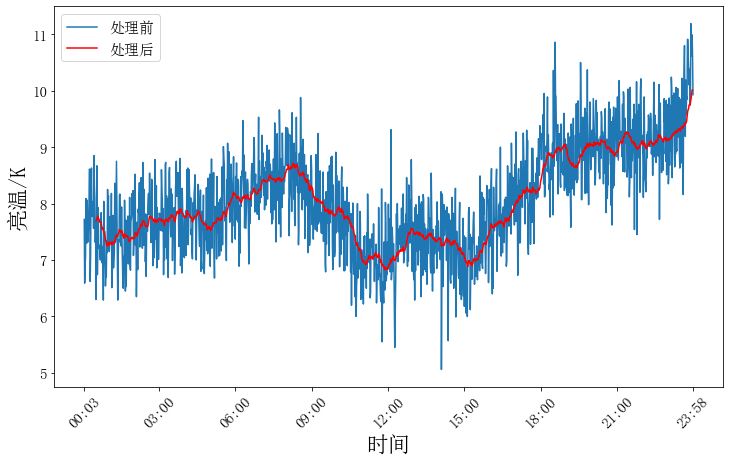

In [68]:
col = lv1_data.columns[14]
n = 30
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.figure(figsize=(12,7))
plt.plot(lv1_data[col],label='处理前')
y = np.convolve(pd.to_numeric(lv1_data[col]),np.ones(n,)/n,mode='full')
y[:n-1] = np.nan
plt.plot(y[:-(n-1)],'r',label='处理后')
plt.legend()
plt.xticks(x_ticks,x_labels,rotation=45)
plt.xlabel('时间',fontsize=22)
plt.ylabel('亮温/K',fontsize=22)
plt.savefig(r'I:\Data\Personal Data\graduation project\Code\Machine Learning\picture\microwave\20090603_'+col+'.svg',bbox_inches='tight',dpi=300,pad_inches=0)